In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import utils.paths as path
import utils.data_cleaning

In [11]:
data_dir = path.make_dir_function('data')

In [12]:
df = pd.read_csv(data_dir('processed','hurtos_processed.csv'))

In [13]:
#FUNCION PARA GUARDAR EL NOMBRE Y LOS VALORES DE UN FEATURE
def values_and_names(feature):
    names = []
    values = []
    for keys,value in df[feature].value_counts().items():
        names.append(keys)
        values.append(value)
    return names,values

In [14]:
bar_color = ['#489fb5','#ffa62b']
horas_palette = ['#006ba6','#ffbc42','#d81159','#8f2d56']
robos_palette = ['#0496ff','#006ba6','#ffbc42','#d81159','#8f2d56']

In [15]:
df

,mes_ultimo_unico_robo,metodo,hora,lugar,celular,efectivo_tarjetas,articulos_de_uso_personal,dispositivos,otra_pertenencia,arma_fuego,...,hizo_llamada,denuncia,lugar_denuncia,autoridad,razon_denuncia,buena_atencion,razon_de_satisfaccion,razon_no_denuncia,recuperacion_objeto,year
0,diciembre,descuido,noche,Calle/Avenida,si,no,no,no,no,no,...,no,si,denuncias en línea,policia,evitar ocurrencia,denuncia_online,denuncia_online,si_denuncia,no,2018
1,marzo,raponazo,noche,Calle/Avenida,si,no,no,si,no,no,...,si,si,denuncias en línea,policia,requisito para tramite,denuncia_online,denuncia_online,si_denuncia,no,2018
2,febrero,atraco,noche,Calle/Avenida,si,no,no,no,no,no,...,no,si,denuncias en línea,policia,evitar ocurrencia,denuncia_online,denuncia_online,si_denuncia,no,2018
3,junio,atraco,tarde,Calle/Avenida,si,no,no,no,no,no,...,no,si,Reporte de objetos perdidos en línea,policia,requisito para tramite,denuncia_online,denuncia_online,si_denuncia,no,2018
4,octubre,atraco,tarde,Calle/Avenida,si,no,no,no,no,si,...,no,si,denuncias en línea,policia,requisito para tramite,denuncia_online,denuncia_online,si_denuncia,no,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16251,septiembre,atraco,tarde,Calle/Avenida,si,si,no,no,no,no,...,si,si,Estación de Policía,policia,recuperar bienes,si,NaN,si_denuncia,no,2020
16252,marzo,atraco,tarde,Calle/Avenida,no,si,no,no,no,no,...,no,si,Estación de Policía,policia,evitar ocurrencia,si,NaN,si_denuncia,no,2020
16253,abril,cosquilleo,tarde,Transporte público,si,no,no,no,no,no,...,no,si,Fiscalía,fiscalia,recuperar bienes,si,NaN,si_denuncia,no,2020
16254,noviembre,atraco,tarde,Calle/Avenida,si,si,no,no,no,si,...,no,si,Estación de Policía,policia,recuperar bienes,si,NaN,si_denuncia,no,2020


In [16]:
df.dtypes

mes_ultimo_unico_robo        object
metodo                       object
hora                         object
lugar                        object
celular                      object
efectivo_tarjetas            object
articulos_de_uso_personal    object
dispositivos                 object
otra_pertenencia             object
arma_fuego                   object
arma_blanca                  object
otros_objetos                object
fuerza_fisica                object
drogas_sustancias            object
hizo_llamada                 object
denuncia                     object
lugar_denuncia               object
autoridad                    object
razon_denuncia               object
buena_atencion               object
razon_de_satisfaccion        object
razon_no_denuncia            object
recuperacion_objeto          object
year                          int64
dtype: object

In [17]:
df.ms_tools.table_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,mes_ultimo_unico_robo,0,16256,0.000000
1,metodo,0,16256,0.000000
2,hora,145,16256,0.891978
3,lugar,0,16256,0.000000
4,celular,0,16256,0.000000
5,efectivo_tarjetas,0,16256,0.000000
6,articulos_de_uso_personal,0,16256,0.000000
7,dispositivos,0,16256,0.000000
8,otra_pertenencia,0,16256,0.000000
9,arma_fuego,0,16256,0.000000


Text(0.5, 1.0, 'dispositivos electronicos')

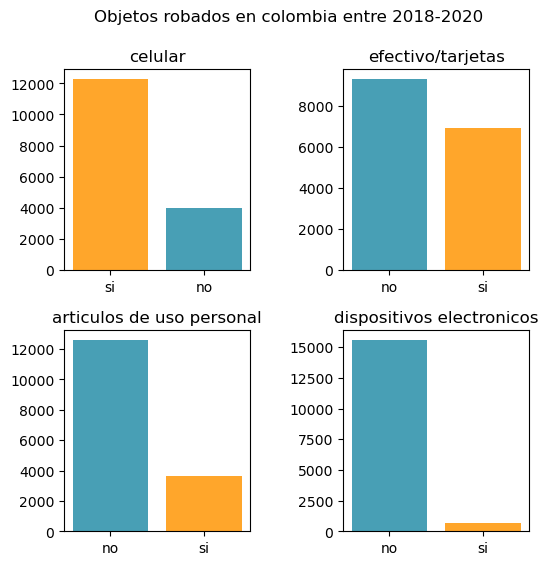

In [18]:
cel_names,cel_values = values_and_names('celular')
et_names,et_values = values_and_names('efectivo_tarjetas')
ar_names,ar_values = values_and_names('articulos_de_uso_personal')
dis_names,dis_values = values_and_names('dispositivos')

fig,axs = plt.subplots(2,2,figsize=(6,6))
fig.subplots_adjust(wspace=0.5,hspace=0.3)
fig.suptitle('Objetos robados en colombia entre 2018-2020')
axs[0,0].bar(cel_names,cel_values,color=['#ffa62b','#489fb5'])
axs[0,0].set_title('celular')
axs[0,1].bar(et_names,et_values,color=bar_color)
axs[0,1].set_title('efectivo/tarjetas')
axs[1,0].bar(ar_names,ar_values,color=bar_color)
axs[1,0].set_title('articulos de uso personal')
axs[1,1].bar(dis_names,dis_values,color=bar_color)
axs[1,1].set_title('dispositivos electronicos')



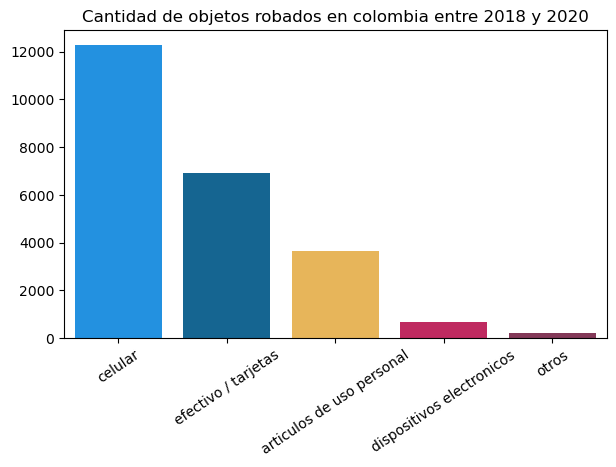

In [19]:
robos = ['celular','efectivo / tarjetas', 'articulos de uso personal',
         'dispositivos electronicos','otros']
counts = [12288,6924,3656,663,225]

plt.figure(figsize=(7,4))
sns.barplot(x=robos,y=counts,palette=robos_palette)
plt.xticks(rotation=34)
plt.title('Cantidad de objetos robados en colombia entre 2018 y 2020')
plt.show()


In [20]:
df_celulares = df[df['celular'] == 'si']

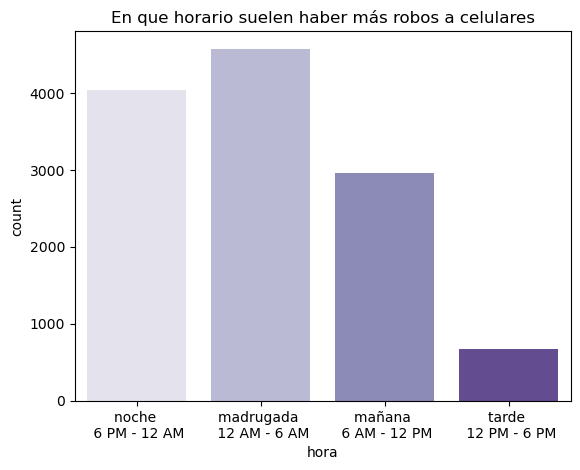

In [21]:
ax = sns.countplot(df_celulares,x='hora',palette="Purples")
ax.set_xticklabels(["noche \n 6 PM - 12 AM",'madrugada \n 12 AM - 6 AM',
                    'mañana \n 6 AM - 12 PM','tarde \n 12 PM - 6 PM'])
ax.set_title('En que horario suelen haber más robos a celulares')
plt.show()


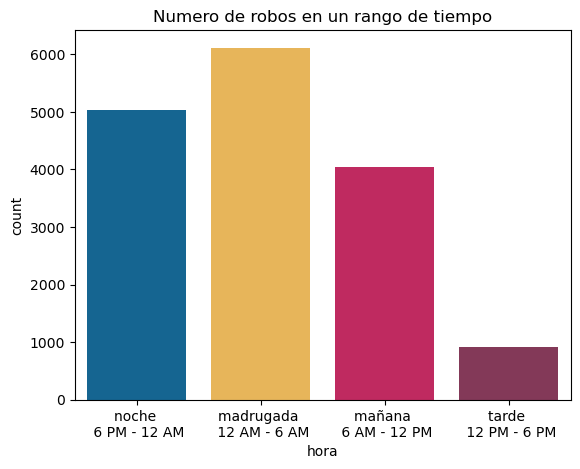

In [22]:
ax = sns.countplot(df,x='hora',palette=horas_palette)
ax.set_xticklabels(["noche \n 6 PM - 12 AM",'madrugada \n 12 AM - 6 AM',
                    'mañana \n 6 AM - 12 PM','tarde \n 12 PM - 6 PM'])
ax.set_title('Numero de robos en un rango de tiempo')
plt.show()

In [23]:
df_celulares.groupby('metodo').count()

,mes_ultimo_unico_robo,hora,lugar,celular,efectivo_tarjetas,articulos_de_uso_personal,dispositivos,otra_pertenencia,arma_fuego,arma_blanca,...,hizo_llamada,denuncia,lugar_denuncia,autoridad,razon_denuncia,buena_atencion,razon_de_satisfaccion,razon_no_denuncia,recuperacion_objeto,year
metodo,,,,,,,,,,,,,,,,,,,,,
atraco,6142,6119,6142,6142,6142,6142,6142,6142,6142,6142,...,6142,6142,6142,5903,6142,6142,5173,6142,6142,6142
cosquilleo,1765,1749,1765,1765,1765,1765,1765,1765,1765,1765,...,1765,1765,1765,1648,1765,1765,1616,1765,1765,1765
descuido,1286,1271,1286,1286,1286,1286,1286,1286,1286,1286,...,1286,1286,1286,1232,1286,1286,1162,1286,1286,1286
engaño,267,265,267,267,267,267,267,267,267,267,...,267,267,267,256,267,267,221,267,267,267
fleteo,48,48,48,48,48,48,48,48,48,48,...,48,48,48,42,48,48,42,48,48,48
otro,39,39,39,39,39,39,39,39,39,39,...,39,39,39,38,39,39,27,39,39,39
paseo millonario,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,16,23,23,23
raponazo,2718,2705,2718,2718,2718,2718,2718,2718,2718,2718,...,2718,2718,2718,2567,2718,2718,2379,2718,2718,2718


In [24]:
df.columns

Index(['mes_ultimo_unico_robo', 'metodo', 'hora', 'lugar', 'celular',
       'efectivo_tarjetas', 'articulos_de_uso_personal', 'dispositivos',
       'otra_pertenencia', 'arma_fuego', 'arma_blanca', 'otros_objetos',
       'fuerza_fisica', 'drogas_sustancias', 'hizo_llamada', 'denuncia',
       'lugar_denuncia', 'autoridad', 'razon_denuncia', 'buena_atencion',
       'razon_de_satisfaccion', 'razon_no_denuncia', 'recuperacion_objeto',
       'year'],
      dtype='object')

In [25]:
df_celulares[df_celulares['arma_blanca']=='si'].groupby('metodo').count()

,mes_ultimo_unico_robo,hora,lugar,celular,efectivo_tarjetas,articulos_de_uso_personal,dispositivos,otra_pertenencia,arma_fuego,arma_blanca,...,hizo_llamada,denuncia,lugar_denuncia,autoridad,razon_denuncia,buena_atencion,razon_de_satisfaccion,razon_no_denuncia,recuperacion_objeto,year
metodo,,,,,,,,,,,,,,,,,,,,,
atraco,3110,3102,3110,3110,3110,3110,3110,3110,3110,3110,...,3110,3110,3110,2997,3110,3110,2671,3110,3110,3110
descuido,28,27,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,24,28,28,28
engaño,18,17,18,18,18,18,18,18,18,18,...,18,18,18,17,18,18,14,18,18,18
fleteo,9,9,9,9,9,9,9,9,9,9,...,9,9,9,8,9,9,9,9,9,9
otro,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,1,2,2,2
paseo millonario,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,2,5,5,5
raponazo,244,244,244,244,244,244,244,244,244,244,...,244,244,244,232,244,244,207,244,244,244


In [26]:
df[(df['arma_fuego']=='si') | (df['arma_blanca']=='si') ]

,mes_ultimo_unico_robo,metodo,hora,lugar,celular,efectivo_tarjetas,articulos_de_uso_personal,dispositivos,otra_pertenencia,arma_fuego,...,hizo_llamada,denuncia,lugar_denuncia,autoridad,razon_denuncia,buena_atencion,razon_de_satisfaccion,razon_no_denuncia,recuperacion_objeto,year
2,febrero,atraco,noche,Calle/Avenida,si,no,no,no,no,no,...,no,si,denuncias en línea,policia,evitar ocurrencia,denuncia_online,denuncia_online,si_denuncia,no,2018
3,junio,atraco,tarde,Calle/Avenida,si,no,no,no,no,no,...,no,si,Reporte de objetos perdidos en línea,policia,requisito para tramite,denuncia_online,denuncia_online,si_denuncia,no,2018
4,octubre,atraco,tarde,Calle/Avenida,si,no,no,no,no,si,...,no,si,denuncias en línea,policia,requisito para tramite,denuncia_online,denuncia_online,si_denuncia,no,2018
6,mayo,atraco,tarde,Vehículo,no,si,si,no,no,si,...,no,si,Reporte de objetos perdidos en línea,policia,requisito para tramite,denuncia_online,denuncia_online,si_denuncia,si,2018
7,marzo,atraco,mañana,Calle/Avenida,si,no,no,no,no,no,...,si,si,denuncias en línea,policia,evitar ocurrencia,denuncia_online,denuncia_online,si_denuncia,no,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,noviembre,atraco,tarde,Carretera/Trocha,no,si,no,no,no,si,...,no,si,Fiscalía,fiscalia,obligacion_ciudadana,si,NaN,si_denuncia,no,2020
16248,abril,raponazo,tarde,Calle/Avenida,si,si,si,no,no,si,...,no,si,Estación de Policía,policia,justicia,no,espera excesiva,si_denuncia,no,2020
16251,septiembre,atraco,tarde,Calle/Avenida,si,si,no,no,no,no,...,si,si,Estación de Policía,policia,recuperar bienes,si,NaN,si_denuncia,no,2020
16252,marzo,atraco,tarde,Calle/Avenida,no,si,no,no,no,no,...,no,si,Estación de Policía,policia,evitar ocurrencia,si,NaN,si_denuncia,no,2020
